## Data Science Salaries 2023 
Dataset
https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

# Importing Modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("assets/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


#### Removing unnecessary columns

In [3]:
df.drop(columns=['salary','salary_currency'],inplace=True)

# Descriptive Analysis

In [4]:
df.shape

(3755, 9)

In [5]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


#### **We have 9 columns with 3755 rows**

#### Numerical columns = 3 
#### ('work_year', 'salary_in_usd', 'remote_ratio')

#### Categorical columns = 6 
#### ('experience_level','employment_type','job_title','employee_residence','company_location','company_size')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB


#### No. of Null values in each column

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### No. of unique values in each column

In [8]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

# Univariate Analysis

## Experience level

In [9]:
df.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [10]:
exp_level = df.experience_level.value_counts()
exp_level

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

**SE Senior level**

**MI Intermediate level**

**EN Entry level**

**EX Executive level**

<Axes: ylabel='experience_level'>

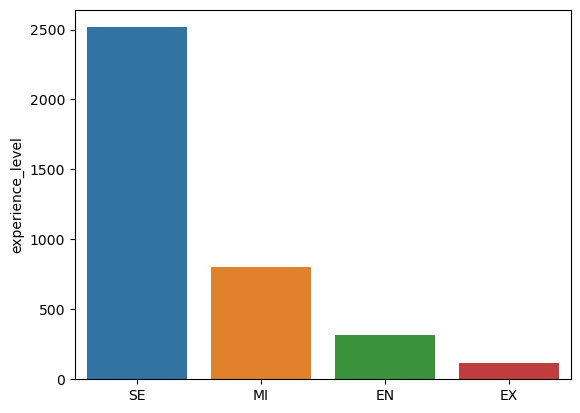

In [11]:
sns.barplot(x=exp_level.index,y=exp_level)

In [12]:
df.experience_level.value_counts()['SE']/df.experience_level.value_counts().sum()

0.6700399467376831

#### **Most of the jobs are in Senior level (67%)**

## Employment type 

In [13]:
df.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [14]:
df.employment_type.value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

**FT Full time**

**PT Part time**

**CT Contract**

**FL Freelance**

<Axes: ylabel='employment_type'>

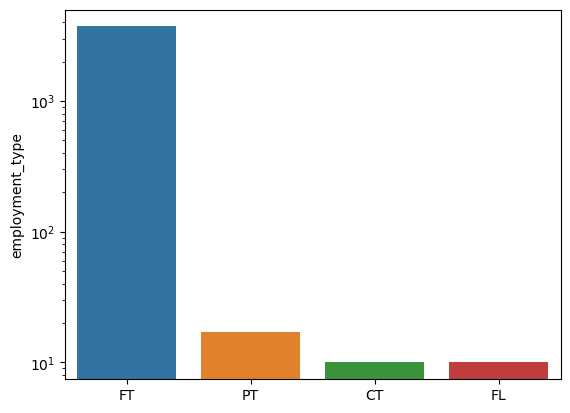

In [16]:
sns.barplot(x=emp_type.index,y=emp_type,log=True)

In [17]:
df.employment_type.value_counts()['FT']/df.employment_type.value_counts().sum()

0.9901464713715047

#### **Most of the jobs are full time (99%)**

## Top 10 Job Titles

In [15]:
emp_type = df.employment_type.value_counts()

In [18]:
df.job_title.value_counts()[:10]

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

## Remote Ratio

In [19]:
df.remote_ratio.unique()

array([100,   0,  50])

In [20]:
rem_ratio = df.remote_ratio.value_counts()
rem_ratio

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

<Axes: ylabel='remote_ratio'>

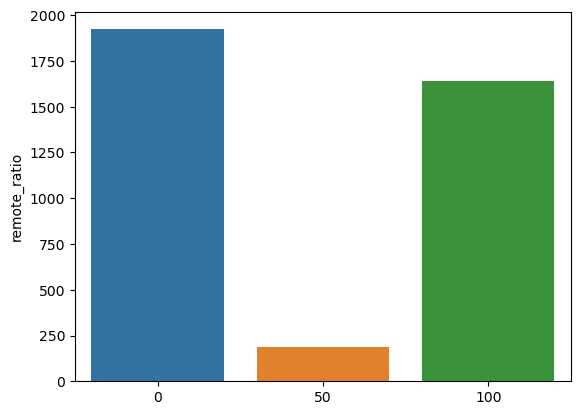

In [21]:
sns.barplot(x=rem_ratio.index,
            y=rem_ratio)

# **Salary Analysis**

In [22]:
df.salary_in_usd.describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

<Axes: xlabel='salary_in_usd', ylabel='Count'>

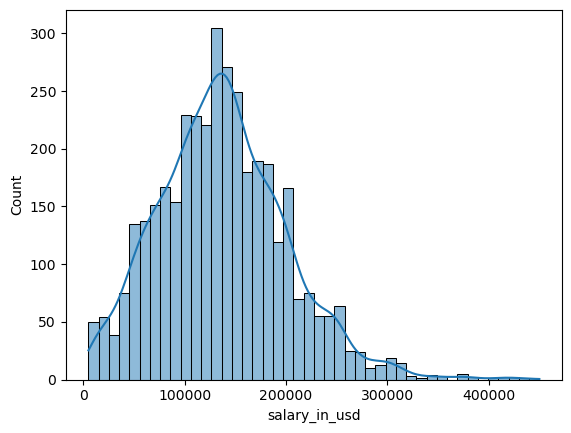

In [23]:
sns.histplot(df.salary_in_usd,kde=True)

## Salary by Experience

In [24]:
sal_by_exp = df.salary_in_usd.groupby(df.experience_level).mean()
sal_by_exp.sort_values(inplace=True)
sal_by_exp

experience_level
EN     78546.284375
MI    104525.939130
SE    153051.071542
EX    194930.929825
Name: salary_in_usd, dtype: float64

SE Senior level

MI Intermediate level

EN Entry level

EX Executive level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

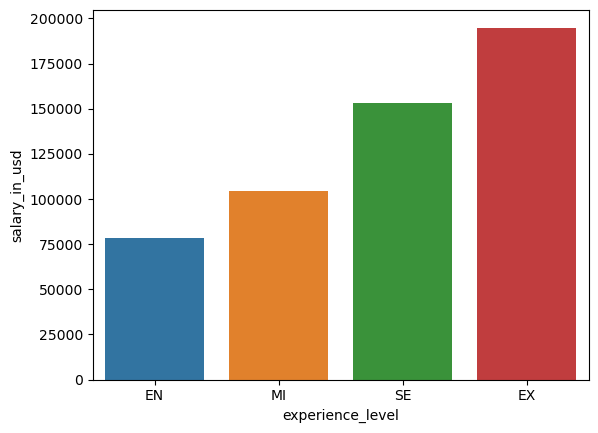

In [25]:
sns.barplot(x=sal_by_exp.index,y=sal_by_exp)

#### **More the experience, more is the salary**

## Salary by job title

In [26]:
sal_by_title = df.salary_in_usd.groupby(df.job_title).mean()
sal_by_title.sort_values(inplace=True,ascending=False)
sal_by_title

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64

[Text(0, 0, 'Data Science Tech Lead'),
 Text(1, 0, 'Cloud Data Architect'),
 Text(2, 0, 'Data Lead'),
 Text(3, 0, 'Data Analytics Lead'),
 Text(4, 0, 'Principal Data Scientist'),
 Text(5, 0, 'Director of Data Science'),
 Text(6, 0, 'Principal Data Engineer'),
 Text(7, 0, 'Machine Learning Software Engineer'),
 Text(8, 0, 'Data Science Manager'),
 Text(9, 0, 'Applied Scientist')]

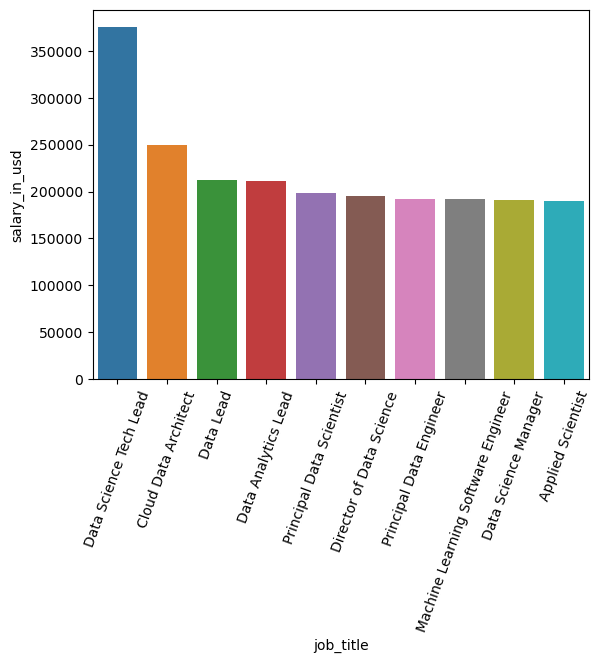

In [27]:
plot = sns.barplot(x=sal_by_title[:10].index,y=sal_by_title[:10])
plot.set_xticklabels(labels=sal_by_title[:10].index,rotation = 70)


## Salary based on employment type

In [28]:
sal_by_emp = df.salary_in_usd.groupby(df.employment_type).mean()
sal_by_emp.sort_values(inplace=True)
sal_by_emp

employment_type
PT     39533.705882
FL     51807.800000
CT    113446.900000
FT    138314.199570
Name: salary_in_usd, dtype: float64

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

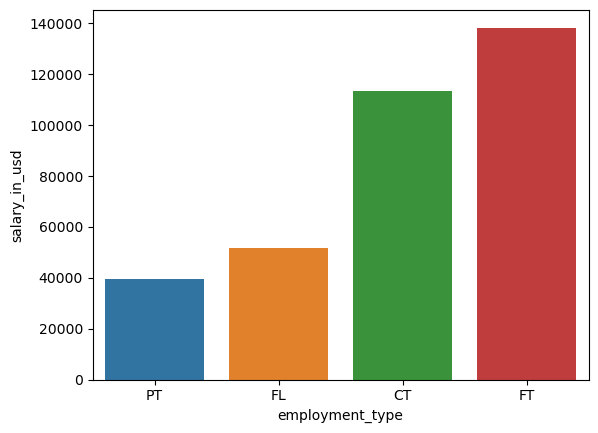

In [29]:
sns.barplot(x=sal_by_emp.index,y=sal_by_emp)

**Full Time employees get the maximum salary, followed by contract employees**

## Salary by remote ratio

In [30]:
sal_by_rem = df.salary_in_usd.groupby(df.remote_ratio).mean()
sal_by_rem.sort_index(inplace=True)
sal_by_rem

remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

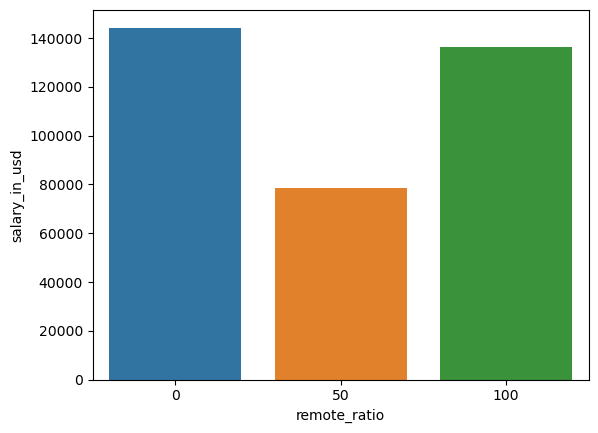

In [31]:
sns.barplot(x=sal_by_rem.index,y=sal_by_rem)

## Salary by Location

In [32]:
sal_by_loc = df.salary_in_usd.groupby(df.company_location).mean()
sal_by_loc.sort_values(ascending=False,inplace=True)
sal_by_loc

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64

In [33]:
sal_exp_emp = df.groupby(['experience_level','employment_type']).mean()
sal_exp_emp.salary_in_usd


/tmp/ipykernel_24678/3437448233.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sal_exp_emp = df.groupby(['experience_level','employment_type']).mean()


experience_level  employment_type
EN                CT                  65234.500000
                  FL                  75000.000000
                  FT                  80496.529801
                  PT                  38885.000000
EX                CT                 416000.000000
                  FT                 192974.566372
MI                CT                  78600.000000
                  FL                  41615.600000
                  FT                 105321.489899
                  PT                  42561.000000
SE                CT                  97500.000000
                  FL                  53333.333333
                  FT                 153214.454799
Name: salary_in_usd, dtype: float64

**Full time employees get the max salary**